# Improve Neural Network by Proper Parameter Initialization

## 0 - Preparation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Literal

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [4]:
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

## 1 - Data Loading and Examination

In [5]:
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)

Reconstruct X and Y to be `(-1, num_samples)` shape

In [6]:
train_X, test_X = train_X.T, test_X.T
train_Y = train_Y.reshape((-1, train_Y.shape[0]))
test_Y = test_Y.reshape((-1, test_Y.shape[0]))

Visualize the plots

In [7]:
train_X.shape

(2, 300)

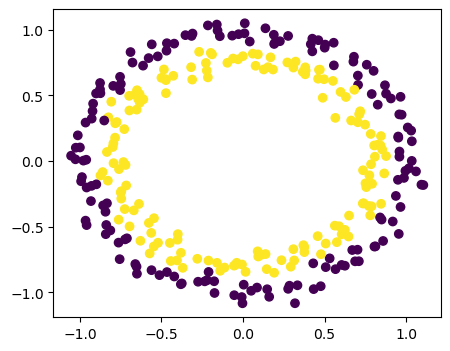

In [8]:
plt.figure(figsize=(5, 4))
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y)
plt.show()

## 2 - Neural Network

The functions `forward_propagation`, `compute_loss`, `backward_propagation`, and `update_parameters` can be found in previous notebooks.

In [9]:
def model(X: np.ndarray, Y: np.ndarray, learning_rate: float=0.01, num_iterations: int=15000, initialization: Literal['zeros', 'random', 'he']='he'):
    """
    Arguments:
    X: (num_features, num_samples)
    Y: (1, num_samples)
    learning_rate: float to denote the learning step
    num_iterations: int to denote the maximum iterations
    initialization: str to denote the parameter initialization method
    
    Returns:
    parameters: {'W1': W1, 'b1': b1, ...}
    """
    grads, losses = {}, []
    num_samples = X.shape[1]
    # Hard-coded the layer size (including input layer)
    layer_size = [2, 10, 5, 1] 
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layer_size)
    elif initialization == "random":
        parameters = initialize_parameters_random(layer_size)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_size)
    else:
        raise Exception(f'{initialization} argument is not supported.')
    # Training loop
    for i in range(num_iterations):
        # Step - 1: forward pass
        a3, cache = forward_propagation(X, parameters)
        # Step - 2: compute the loss
        loss = compute_loss(a3, Y)
        # Step - 3: backward pass
        grads = backward_propagation(X, Y, cache)
        # Step - 4: update parameters using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)
        # Step - 5: Visualize the training process
        if i % 1000 == 0 or i == num_iterations-1:
            print(f"Loss after iteration {i}: {loss:.6f}")
            losses.append(loss)  
    return parameters

## 3 - Different Initialization Approach

### 3.1 - Initialize with All Zeros

In [10]:
def initialize_parameters_zeros(layer_size: list[int]):
    """
    Arguments:
    layer_size: [input_size, layer_1_size, layer_2_size, ...]
    
    Returns:
    parameters: {'W1': W1, 'b1': b1, ...}
    """
    parameters = {}
    num_layers = len(layer_size)
    # Initialize all weight and bias parameters with zeros 
    for layer in range(1, num_layers):
        parameters[f'W{layer}'] = np.zeros([layer_size[layer], layer_size[layer-1]])
        parameters[f'b{layer}'] = np.zeros([layer_size[layer], 1])
    return parameters

In [11]:
parameters = model(train_X, train_Y, initialization = "zeros")
predictions_train = predict(train_X, train_Y, parameters)

Loss after iteration 0: 0.693147
Loss after iteration 1000: 0.693147
Loss after iteration 2000: 0.693147
Loss after iteration 3000: 0.693147
Loss after iteration 4000: 0.693147
Loss after iteration 5000: 0.693147
Loss after iteration 6000: 0.693147
Loss after iteration 7000: 0.693147
Loss after iteration 8000: 0.693147
Loss after iteration 9000: 0.693147
Loss after iteration 10000: 0.693147
Loss after iteration 11000: 0.693147
Loss after iteration 12000: 0.693147
Loss after iteration 13000: 0.693147
Loss after iteration 14000: 0.693147
Loss after iteration 14999: 0.693147
Accuracy: 0.5


Why the loss does not decrease at all?

Since the weight matrix $W$ and bias vector $\vec{b}$ are initialized with zeros, then at any i-th layer:

$$
Z^{[i]} = W^{[i]} A^{i-1} + \vec{b}^{[i]} = \mathbf{0}
$$

After passing it into activation function, e.g., sigmoid

$$
\hat{y} = A = \text{sigmoid}(0) = \frac{1}{1+exp(0)} = 0.5
$$

Then if we passing $\hat{y}$ into cross-entropy loss function, regardless of true $y$ value, it is always:

$$
L = -1 \times \text{log}(0.5) = 0.693
$$

This means that, the model will not adjust weight parameters because the loss is stucked with 0.693 infinitely.

### 3.2 - Random Initialization

In [12]:
def initialize_parameters_random(layer_size: list[int]):
    """
    Arguments:
    layer_size: [input_size, layer_1_size, layer_2_size, ...]
    
    Returns:
    parameters: {'W1': W1, 'b1': b1, ...}
    """
    parameters = {}
    num_layers = len(layer_size)
    # Initialize all weight and bias parameters with zeros 
    for layer in range(1, num_layers):
        parameters[f'W{layer}'] = np.random.randn(layer_size[layer], layer_size[layer-1])
        parameters[f'b{layer}'] = np.zeros([layer_size[layer], 1])
    return parameters

In [13]:
parameters = model(train_X, train_Y, initialization = "random")
predictions_train = predict(train_X, train_Y, parameters)

Loss after iteration 0: 1.363915
Loss after iteration 1000: 0.646550
Loss after iteration 2000: 0.609622
Loss after iteration 3000: 0.546739
Loss after iteration 4000: 0.450540
Loss after iteration 5000: 0.366878
Loss after iteration 6000: 0.291840
Loss after iteration 7000: 0.232236
Loss after iteration 8000: 0.190040
Loss after iteration 9000: 0.160270
Loss after iteration 10000: 0.138588
Loss after iteration 11000: 0.122504
Loss after iteration 12000: 0.109963
Loss after iteration 13000: 0.099963
Loss after iteration 14000: 0.091735
Loss after iteration 14999: 0.084893
Accuracy: 0.9833333333333333


After initializing the weight parameters with random numbers, the loss looks norm: it consistently decreses during training stage.

### 3.3 - Initialization with He's Method

The scholar He recommended that we can initialize the weight parameters by random numbers scaled by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$

In [14]:
def initialize_parameters_he(layer_size: list[int]):
    """
    Arguments:
    layer_size: [input_size, layer_1_size, layer_2_size, ...]
    
    Returns:
    parameters: {'W1': W1, 'b1': b1, ...}
    """
    parameters = {}
    num_layers = len(layer_size)
    # Initialize all weight and bias parameters with zeros 
    for layer in range(1, num_layers):
        parameters[f'W{layer}'] = np.random.randn(layer_size[layer], layer_size[layer-1]) * np.sqrt(2/layer_size[layer-1])
        parameters[f'b{layer}'] = np.zeros([layer_size[layer], 1])
    return parameters

In [15]:
parameters = model(train_X, train_Y, initialization = "he")
predictions_train = predict(train_X, train_Y, parameters)

Loss after iteration 0: 1.039547
Loss after iteration 1000: 0.688046
Loss after iteration 2000: 0.680204
Loss after iteration 3000: 0.673100
Loss after iteration 4000: 0.663916
Loss after iteration 5000: 0.651535
Loss after iteration 6000: 0.633080
Loss after iteration 7000: 0.604306
Loss after iteration 8000: 0.562046
Loss after iteration 9000: 0.499200
Loss after iteration 10000: 0.417517
Loss after iteration 11000: 0.336847
Loss after iteration 12000: 0.269911
Loss after iteration 13000: 0.218528
Loss after iteration 14000: 0.181125
Loss after iteration 14999: 0.154632
Accuracy: 0.99


The initialization method proposed by He also works fairly well.

# 4 Conclusions

- Different initializations lead to very different results
- Mever initialize weight parameters with all zeros